In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import seaborn as sns
from functions import create_base, add_basket_info, add_coupon_info
from functions import get_baskets, get_coupons, get_prediction_index, get_3_files
from functions import split_4_way

In [2]:
baskets, coupons, prediction_index = get_3_files()
baskets = baskets[baskets['customer'] < 2000]

In [3]:
base = create_base(customers=range(1900,2000))
base['basket'] = base['week'].astype(str) + '_' +base['customer'].astype(str)
base = add_basket_info(base, baskets)
base = add_coupon_info(base, baskets, coupons)

In [4]:
x_train, y_train, x_test, y_test = split_4_way(base, target_col='isBought', unkwown_week=89)

# Trying to create categories

In [5]:
base

,week,customer,product,basket,price,isBought,dGiven,isGiven,isUsed
0,0,1900,0,0_1900,0,False,0,False,False
1,0,1900,1,0_1900,0,False,0,False,False
2,0,1900,2,0_1900,0,False,0,False,False
3,0,1900,3,0_1900,0,False,0,False,False
4,0,1900,4,0_1900,0,False,0,False,False
...,...,...,...,...,...,...,...,...,...
2249995,89,1999,245,89_1999,549,True,0,False,False
2249996,89,1999,246,89_1999,0,False,30,True,False
2249997,89,1999,247,89_1999,0,False,0,False,False
2249998,89,1999,248,89_1999,0,False,0,False,False


In [12]:
pd.set_option('max_rows',100)

In [7]:
fake1 = pd.DataFrame({
    'apple':[0,1,0,1],
    'pear':[1,1,1,0],
    'mango':[1,1,1,1],
    'banana':[0,0,0,1]
})

fake1

,apple,pear,mango,banana
0,0,1,1,0
1,1,1,1,0
2,0,1,1,0
3,1,0,1,1


In [8]:
fake1.T.dot(fake1)

,apple,pear,mango,banana
apple,2,1,2,1
pear,1,3,3,0
mango,2,3,4,1
banana,1,0,1,1


In [11]:
base[(base['isBought']==1) & (base['product']==1)].head()

,week,customer,product,basket,price,isBought,dGiven,isGiven,isUsed
10251,0,1941,1,0_1941,560,True,0,False,False
11001,0,1944,1,0_1944,560,True,0,False,False
12751,0,1951,1,0_1951,560,True,0,False,False
18001,0,1972,1,0_1972,560,True,0,False,False
32751,1,1931,1,1_1931,392,True,30,True,True


In [24]:
np.stack([np.array(base.iloc[:250,5]),np.array(base.iloc[:250,5])])

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [26]:
for i in range(10):
    np.array(base.iloc[:250,5])

<AxesSubplot:>

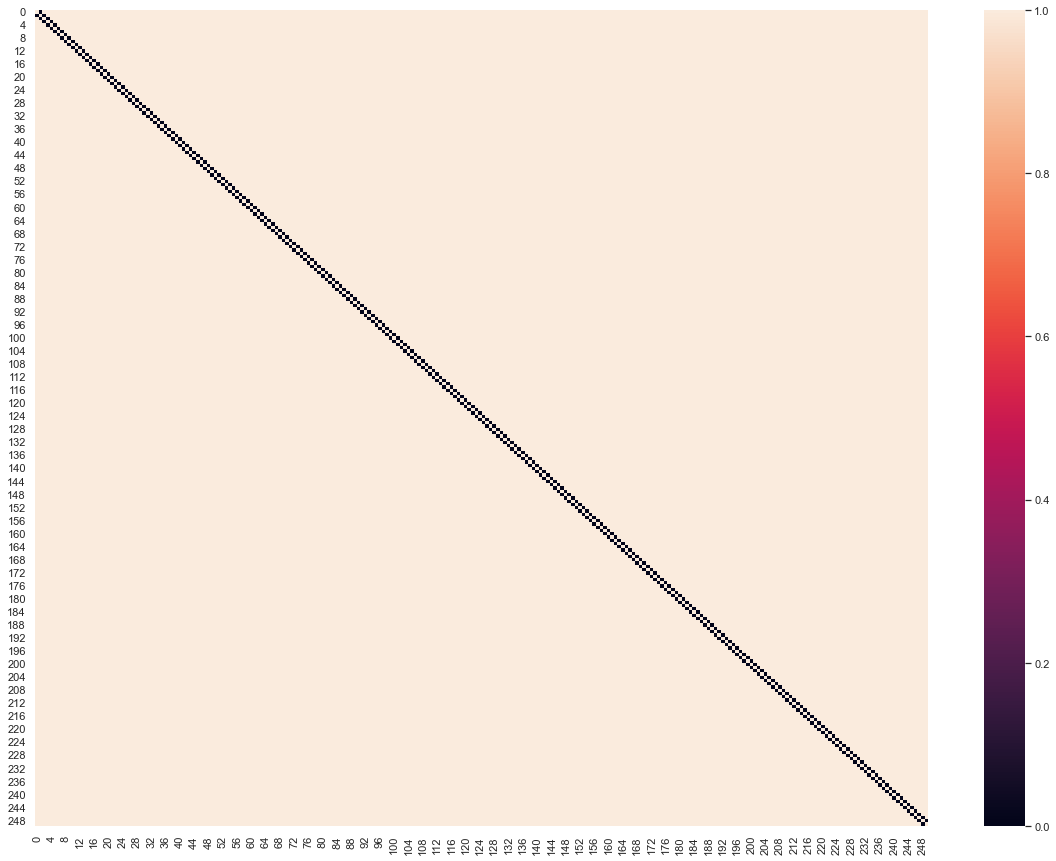

In [ ]:
matrix = base.iloc[0:0+250, 5].values

for i in range(1,base.basket.nunique()):
    start = i*250
    matrix = np.vstack((matrix, base.iloc[i:i+250, 5].values))
    
co_df = pd.DataFrame(matrix)
co_matrix = co_df.T.dot(co_df)
co_matrix[co_matrix > 10] = 1

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(co_matrix, annot=False)